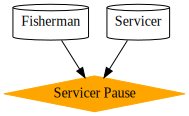

In [4]:
import os
import sys
sys.path.append("..")

from MSML.src import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz,
                      write_basic_report_full, write_action_chain_reports)
from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
ms = load_from_json(deepcopy(math_spec_json))

for behavior in ["Servicer Pause"]:
    display(create_action_chains_graph(ms, [behavior], behavior))

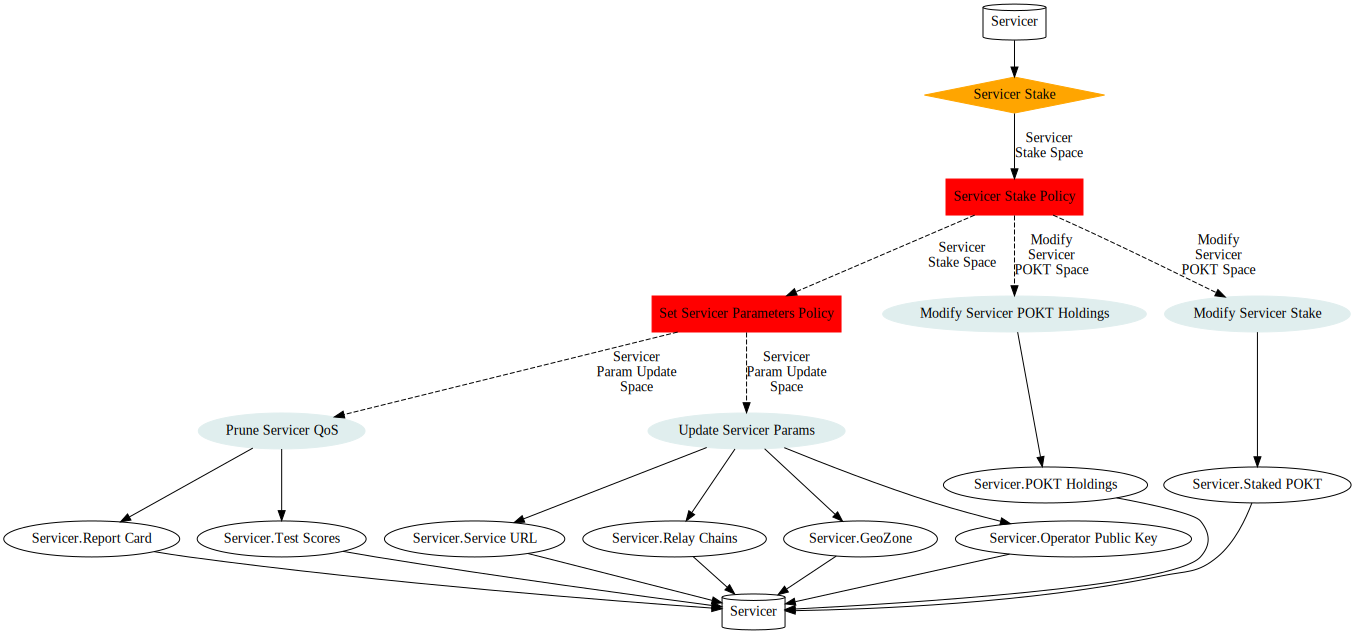

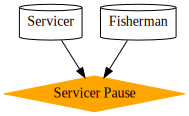

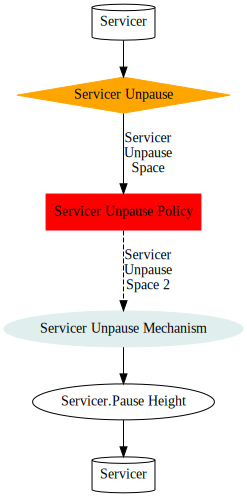

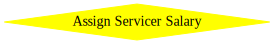

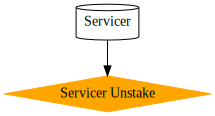

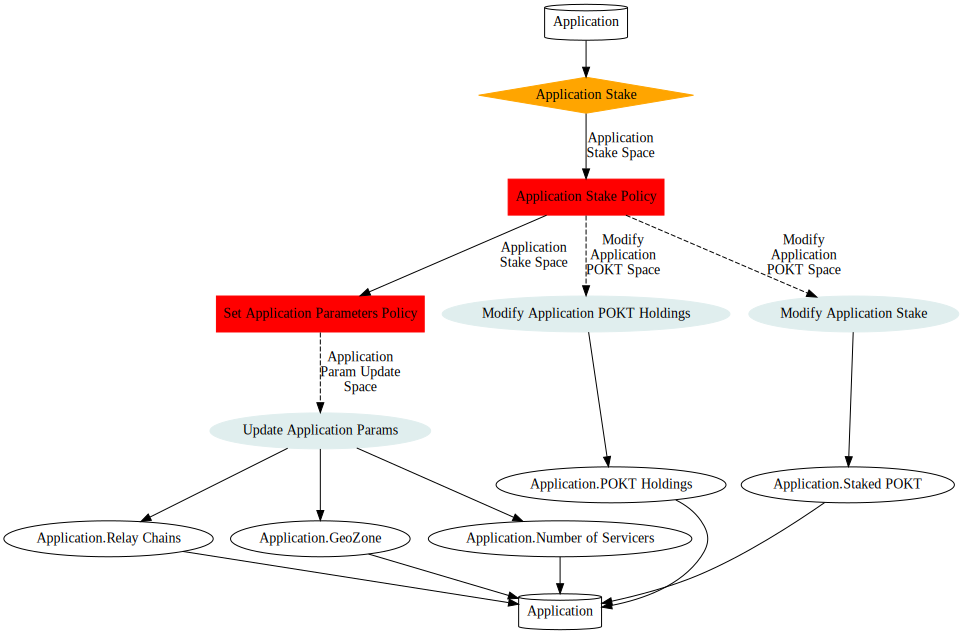

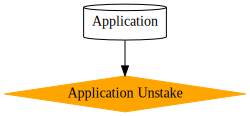

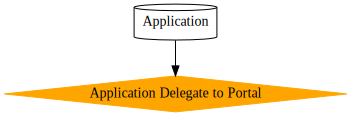

In [2]:
for behavior in ["Servicer Stake", "Servicer Pause", "Servicer Unpause", "Assign Servicer Salary",
                "Servicer Unstake", "Application Stake", "Application Unstake", "Application Delegate to Portal"]:
    display(create_action_chains_graph(ms, [behavior], behavior))

In [3]:
write_action_chain_reports(ms, "reports/actions", ["Servicer Stake", "Application Stake"])
write_basic_report_full(ms, "reports", "Basic Report")